<a href="https://colab.research.google.com/github/namdarine/TIF_Chicago_Project/blob/main/Median_Income_increase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely.wkt import loads
import warnings
warnings.filterwarnings("ignore")
import pickle
import folium
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
JJ_path = '/content/drive/MyDrive/IPRO497_Demographic Team/Final/data/'
K_path = '/Users/kunwoosmac/Library/Mobile Documents/com~apple~CloudDocs/Python Workspace/IIT Courses/TIF DS Project/Final/data/'
L_path = '/content/drive/MyDrive/IPRO/IPRO 497 TIF Districts/IPRO497_Demographic Team/Final/data/'

JJ_path_image = '/content/drive/MyDrive/IPRO497_Demographic Team/Final/images/'

path = JJ_path
path_image = JJ_path_image

In [ ]:
with open(path+'year_race_community_Median_TIF.pickle', 'rb') as f:
	year_race_community_Median_TIF = pickle.load(f)
with open(path+'year_race_community_Median_Non_TIF.pickle', 'rb') as f:
	year_race_community_Median_Non_TIF = pickle.load(f)


In [ ]:
clusters = np.load(path+'clustering.npy')

In [ ]:
def percent_median_income_increase(year_race_community_Median_info):
  total = np.zeros((3,4))
  for race_num, race_name in enumerate(['Median Income of White','Median Income of Black','Median Income of Latin']):
    up_left = np.zeros(4)
    up_right = np.zeros(4)
    down = np.zeros(4)
    num = np.zeros(4)


    for com_num, cluster_name in enumerate(clusters):
      up_left[cluster_name] += year_race_community_Median_info[race_name].iloc[com_num][0]
      up_right[cluster_name] += year_race_community_Median_info[race_name].iloc[com_num][-1]
      down[cluster_name] += year_race_community_Median_info[race_name].iloc[com_num][0]
      num[cluster_name] +=1

    total[race_num] = (up_right - up_left)*100/down
  total = total.T
  # print(total)
  df = pd.DataFrame(total, columns=['White','Black','Latino'])
  return df

In [ ]:
Median_income_increase_TIF = percent_median_income_increase(year_race_community_Median_TIF)
Median_income_increase_Non_TIF = percent_median_income_increase(year_race_community_Median_Non_TIF)
Median_income_increase_TIF

,White,Black,Latino
0,46.912681,54.561702,53.001350
1,33.354508,32.657509,36.573168
2,25.704215,28.343542,23.923982
3,42.091588,38.187065,41.682997


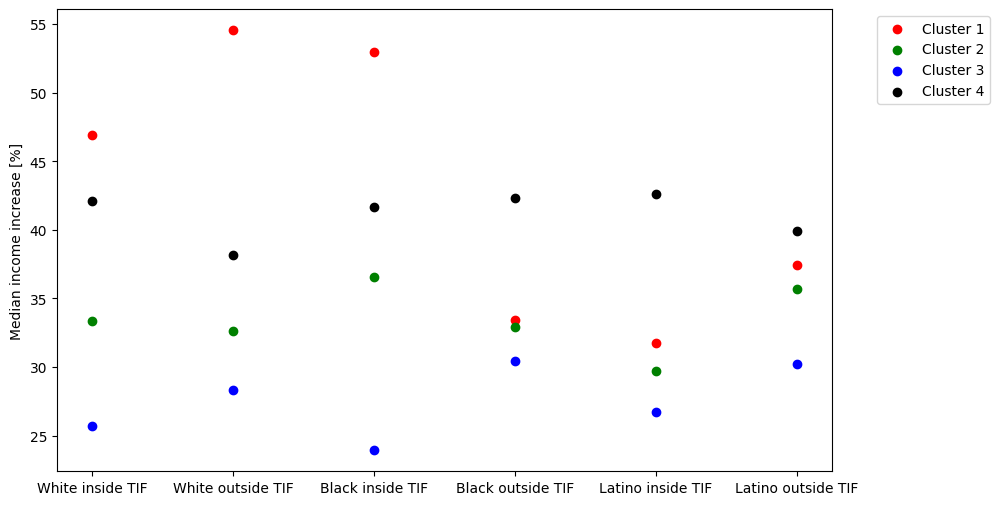

In [ ]:
plt.figure(figsize=(10,6))
color_list = ['red','green','blue','black']
label_name = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4']
for cluster_num in range(4):
  plt.scatter([0,1,2],[Median_income_increase_TIF['White'].iloc[cluster_num],Median_income_increase_TIF['Black'].iloc[cluster_num],Median_income_increase_TIF['Latino'].iloc[cluster_num]],color=color_list[cluster_num],label=label_name[cluster_num])
  plt.scatter([3,4,5],[Median_income_increase_Non_TIF['White'].iloc[cluster_num],Median_income_increase_Non_TIF['Black'].iloc[cluster_num],Median_income_increase_Non_TIF['Latino'].iloc[cluster_num]],color=color_list[cluster_num])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Median income increase [%]')
plt.xticks([0,1,2,3,4,5],['White inside TIF','White outside TIF','Black inside TIF','Black outside TIF','Latino inside TIF','Latino outside TIF'])
plt.savefig(JJ_path_image+'Others/'+'Median income increase graph in Chicago.png',bbox_inches='tight')
plt.show()